In [1]:
# Load packages
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from pathlib import Path
import os
import shared_functions as sf

In [2]:
# Define model & file name
model_name = 'NaiveBaseline'
file_name = 'property-sales_new-york-city_2022_pre-processed'

In [3]:
# Create output directory for exports
Path(f'../models/{model_name}').mkdir(parents=True, exist_ok=True)

In [4]:
# Load subset keys as list
subset_keys = pd.read_csv(f'../data/processed/subset_keys.csv').squeeze().to_list()

In [5]:
# Load subset index as series
subset_index = pd.read_csv(f'../data/processed/subset_index.csv', index_col=0)

In [6]:
# Set random seed
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [7]:
# Define dataset parameters
dataset_params = {
    'data': f'../data/processed/{file_name}.parquet',
    'target_name': 'sale_price',
    'to_drop': 'sale_price_adj',
    'subset_index': '../data/processed/subset_index.csv',
    'numerical_imputer': SimpleImputer(missing_values=pd.NA, strategy='mean'),
    'data_overview': f'../data/processed/{file_name}_data-overview.csv'
    }

In [8]:
# Instantiate dataset
dataset = sf.MultiModalDataset(**dataset_params)

In [9]:
# Store expected outputs
y_true = dataset.y.squeeze()

# Store naive baseline
y_pred = y_true.mean()

# Create predictions data frame
predictions = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'subset': subset_index.subset})

# Sort predictions by index
predictions.sort_index(inplace=True)

In [10]:
# Save predictions
predictions.to_csv(f'../models/{model_name}/predictions.csv')

In [11]:
# Compute performance metrics
metrics = sf.get_metrics(predictions, subset_keys, save_as=f'../models/{model_name}/perf_metrics.csv')

Subset         RMSE         MAE   MAPE      R2
----------------------------------------------
train   1248570.616  790520.656  1.251  -0.000
val     1237870.196  787454.125  1.262  -0.000
test    1244115.805  784701.222  1.224  -0.000
----------------------------------------------
total   1246614.378  789050.167  1.247  -0.000


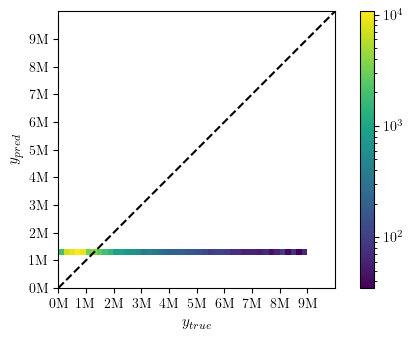

In [12]:
# Plot predictions vs actuals
sf.plot_pred_vs_actual(predictions, save_as=f'../models/{model_name}/predictions_vs_actuals.pdf')